# Plot the values to show what region has more active doctors

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("dark")
import matplotlib.pyplot as plt

In [57]:
# Load the data 'sisrhcgm201608.csv'
df = pd.read_csv("data/sisrhcgm201608.csv", sep=";")
df.head()

,SERVIDOR,SEXO,VINCULO,CONSELHO,ESPECIALIDAD,CARGO,NIVEL,PARCEIRA,JORNADA,REGIME,CNES,DATA_INICIO,DATA_FIM,READAPTADO,ATIVO
0,38154,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,2752344.0,01/10/1991,NaN,-,S
1,43713,F,PARCEIRA,-,-,AGENTE COMUNITARIO DE SAUDE,O,SANTA CATARINA,J40,CLT,2788039.0,22/10/2001,03/05/2006,N,N
2,43457,F,PARCEIRA,-,-,AGENTE COMUNITARIO DE SAUDE,O,IAE UNASP,J40,CLT,2787563.0,10/12/2001,07/04/2015,N,N
3,83426,F,HSPM,CRM,INFECTOLOGIA,MEDICO,S,-,J20,CLT,2752077.0,14/01/2002,01/04/2009,N,N
4,16838,F,MUNICIPAL,-,AUXILIAR DE ENFERMAGEM,AUXILIAR DE ENFERMAGEM,M,-,JET 36,EFETIVO,2079186.0,09/10/1995,01/04/2016,N,N


In [58]:
df.shape

(188212, 15)

In [59]:
# Check the sum where column 'ATIVO' == S
len(df[df.ATIVO == 'S'])

80820

In [60]:
df.dtypes

SERVIDOR          int64
SEXO             object
VINCULO          object
CONSELHO         object
ESPECIALIDAD     object
CARGO            object
NIVEL            object
PARCEIRA         object
JORNADA          object
REGIME           object
CNES            float64
DATA_INICIO      object
DATA_FIM         object
READAPTADO       object
ATIVO            object
dtype: object

In [61]:
# Check the null values
df.isnull().sum()

SERVIDOR            0
SEXO                0
VINCULO             0
CONSELHO            0
ESPECIALIDAD       85
CARGO               0
NIVEL               0
PARCEIRA            0
JORNADA             0
REGIME              0
CNES            10501
DATA_INICIO         0
DATA_FIM        80817
READAPTADO          0
ATIVO               0
dtype: int64

In [62]:
# Drop null values in the column 'CNES'
df = df[df['CNES'].notna()]

In [63]:
# Check the null values
df.isnull().sum()

SERVIDOR            0
SEXO                0
VINCULO             0
CONSELHO            0
ESPECIALIDAD       83
CARGO               0
NIVEL               0
PARCEIRA            0
JORNADA             0
REGIME              0
CNES                0
DATA_INICIO         0
DATA_FIM        77521
READAPTADO          0
ATIVO               0
dtype: int64

In [64]:
# Load only where the column 'ATIVO' is equal 'S'
df = df[df.ATIVO == 'S']

In [97]:
# Check the sum where column 'ATIVO' is equal 'S'
len(df[df.ATIVO == 'S'])

77524

In [65]:
df.head()

,SERVIDOR,SEXO,VINCULO,CONSELHO,ESPECIALIDAD,CARGO,NIVEL,PARCEIRA,JORNADA,REGIME,CNES,DATA_INICIO,DATA_FIM,READAPTADO,ATIVO
0,38154,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,2752344.0,01/10/1991,NaN,-,S
5,19384,F,MUNICIPAL,-,AUXILIAR DE ENFERMAGEM,AUXILIAR DE ENFERMAGEM,M,-,J30,EFETIVO,2752441.0,09/07/1980,NaN,N,S
8,168894,F,AUTARQUIA,-,-,TECNICO EM ENFERMAGEM,M,-,J30,EFETIVO,2082837.0,17/06/2014,NaN,N,S
10,100533,F,PARCEIRA,-,-,ACOMPANHANTE COMUNITARIO DE IDOSO,O,ASF,J40,CLT,4049799.0,08/12/2009,NaN,-,S
15,89208,F,PARCEIRA,CRM,PEDIATRIA,MEDICO,S,SANTA MARCELINA,MENS 60,CLT,5963826.0,01/11/2008,NaN,N,S


In [67]:
# Load the data 'deinfosacadsau2014.csv'
df2 = pd.read_csv("data/deinfosacadsau2014.csv", sep=";")
df2.head()

,ID,LONG,LAT,SETCENS,AREAP,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO5,...,TELEFONE,CEP,CNES,SA_DEPADM,DEPADM,SA_TIPO,TIPO,SA_CLASSE,CLASSE,LEITOS
0,1,-46490063,-23522787,355030864000052,3550308005143,65,PONTE RASA,22,ERMELINO MATARAZZO,Leste,...,22800080.0,3680000.0,6393608.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
1,2,-46773393,-23673297,355030819000016,3550308005232,19,CAPAO REDONDO,17,CAMPO LIMPO,Sul,...,58742846.0,5666000.0,6194974.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
2,3,-46651898,-23531575,355030869000001,3550308005027,70,SANTA CECILIA,9,SE,Centro,...,38260096.0,1153000.0,6138314.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
3,4,-46454974,-23538945,355030837000019,3550308005202,36,ITAQUERA,27,ITAQUERA,Leste,...,62860015.0,8210090.0,6394558.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
4,5,-46539564,-23599363,355030872000050,3550308005158,74,SAO LUCAS,29,VILA PRUDENTE,Leste,...,NaN,3244030.0,6759998.000000,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0


In [68]:
# Check the types
df2.dtypes

ID              int64
LONG            int64
LAT             int64
SETCENS         int64
AREAP           int64
CODDIST         int64
DISTRITO       object
CODSUBPREF      int64
SUBPREF        object
REGIAO5        object
REGIAO8        object
ESTABELECI     object
ENDERECO       object
BAIRRO         object
TELEFONE      float64
CEP           float64
CNES           object
SA_DEPADM       int64
DEPADM         object
SA_TIPO         int64
TIPO           object
SA_CLASSE       int64
CLASSE         object
LEITOS          int64
dtype: object

In [69]:
# Check the null values
df2.isnull().sum()

ID              0
LONG            0
LAT             0
SETCENS         0
AREAP           0
CODDIST         0
DISTRITO        0
CODSUBPREF      0
SUBPREF         0
REGIAO5         0
REGIAO8         0
ESTABELECI      0
ENDERECO        0
BAIRRO         10
TELEFONE      167
CEP            76
CNES            0
SA_DEPADM       0
DEPADM          0
SA_TIPO         0
TIPO            0
SA_CLASSE       0
CLASSE          0
LEITOS          0
dtype: int64

In [70]:
# Convert the column 'CNES' to float64
df2['CNES'] = pd.to_numeric(df2['CNES'], errors='coerce')

In [71]:
df2.head()

,ID,LONG,LAT,SETCENS,AREAP,CODDIST,DISTRITO,CODSUBPREF,SUBPREF,REGIAO5,...,TELEFONE,CEP,CNES,SA_DEPADM,DEPADM,SA_TIPO,TIPO,SA_CLASSE,CLASSE,LEITOS
0,1,-46490063,-23522787,355030864000052,3550308005143,65,PONTE RASA,22,ERMELINO MATARAZZO,Leste,...,22800080.0,3680000.0,6393608.0,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
1,2,-46773393,-23673297,355030819000016,3550308005232,19,CAPAO REDONDO,17,CAMPO LIMPO,Sul,...,58742846.0,5666000.0,6194974.0,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
2,3,-46651898,-23531575,355030869000001,3550308005027,70,SANTA CECILIA,9,SE,Centro,...,38260096.0,1153000.0,6138314.0,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
3,4,-46454974,-23538945,355030837000019,3550308005202,36,ITAQUERA,27,ITAQUERA,Leste,...,62860015.0,8210090.0,6394558.0,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0
4,5,-46539564,-23599363,355030872000050,3550308005158,74,SAO LUCAS,29,VILA PRUDENTE,Leste,...,NaN,3244030.0,6759998.0,1,Municipal,49,AMA ESPECIALIDADES,1,AMBULATORIOS ESPECIALIZADOS,0


In [73]:
# Check the types
df2.dtypes

ID              int64
LONG            int64
LAT             int64
SETCENS         int64
AREAP           int64
CODDIST         int64
DISTRITO       object
CODSUBPREF      int64
SUBPREF        object
REGIAO5        object
REGIAO8        object
ESTABELECI     object
ENDERECO       object
BAIRRO         object
TELEFONE      float64
CEP           float64
CNES          float64
SA_DEPADM       int64
DEPADM         object
SA_TIPO         int64
TIPO           object
SA_CLASSE       int64
CLASSE         object
LEITOS          int64
dtype: object

In [74]:
# Join the dataframes df and df2 by the column 'CNES'
df_merge = pd.merge(df, df2, on='CNES', how='outer')
df_merge

,SERVIDOR,SEXO,VINCULO,CONSELHO,ESPECIALIDAD,CARGO,NIVEL,PARCEIRA,JORNADA,REGIME,...,BAIRRO,TELEFONE,CEP,SA_DEPADM,DEPADM,SA_TIPO,TIPO,SA_CLASSE,CLASSE,LEITOS
0,38154.0,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,...,JD ITALIA,69651066.0,NaN,1.0,Municipal,24.0,CENTRO DE ESPECIALIDADES ODONTOLOGICAS/CEO,1.0,AMBULATORIOS ESPECIALIZADOS,0.0
1,38154.0,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,...,JD ITALIA,69561066.0,3192060.0,1.0,Municipal,58.0,PROGRAMAS E SERVICOS,9.0,OUTROS ESTABELECIMENTOS E SERVICOS ESPECIALIZADOS,0.0
2,38154.0,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,...,JD ITALIA,69561066.0,3192060.0,1.0,Municipal,58.0,PROGRAMAS E SERVICOS,9.0,OUTROS ESTABELECIMENTOS E SERVICOS ESPECIALIZADOS,0.0
3,38154.0,F,ESTADUAL,-,-,AUXILIAR DE SERVICOS GERAIS,O,-,J40,ADMITIDO LEI 500,...,JD ITALIA,69561066.0,3192060.0,1.0,Municipal,45.0,UNIDADE BASICA DE SAUDE,5.0,UBS/POSTO DE SAUDE/CENTRO DE SAUDE,0.0
4,38250.0,F,ESTADUAL,-,-,CIRURGIAO DENTISTA,S,-,J20,EFETIVO,...,JD ITALIA,69651066.0,NaN,1.0,Municipal,24.0,CENTRO DE ESPECIALIDADES ODONTOLOGICAS/CEO,1.0,AMBULATORIOS ESPECIALIZADOS,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JD S PAULO,69730887.0,2039090.0,4.0,Privado,48.0,UNIDADE DE APOIO DIAGNOSE E TERAPIA,2.0,APOIO DIAGNOSTICO,0.0
136020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,PERDIZES,36761046.0,5024030.0,4.0,Privado,48.0,UNIDADE DE APOIO DIAGNOSE E TERAPIA,2.0,APOIO DIAGNOSTICO,0.0
136021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,VILA ROMANA,38658319.0,5044010.0,4.0,Privado,48.0,UNIDADE DE APOIO DIAGNOSE E TERAPIA,2.0,APOIO DIAGNOSTICO,0.0
136022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CONSOLACAO,32555404.0,NaN,4.0,Privado,48.0,UNIDADE DE APOIO DIAGNOSE E TERAPIA,2.0,APOIO DIAGNOSTICO,0.0


In [75]:
# Check the columns
df_merge.columns

Index(['SERVIDOR', 'SEXO', 'VINCULO', 'CONSELHO', 'ESPECIALIDAD', 'CARGO',
       'NIVEL', 'PARCEIRA', 'JORNADA', 'REGIME', 'CNES', 'DATA_INICIO',
       'DATA_FIM', 'READAPTADO', 'ATIVO', 'ID', 'LONG', 'LAT', 'SETCENS',
       'AREAP', 'CODDIST', 'DISTRITO', 'CODSUBPREF', 'SUBPREF', 'REGIAO5',
       'REGIAO8', 'ESTABELECI', 'ENDERECO', 'BAIRRO', 'TELEFONE', 'CEP',
       'SA_DEPADM', 'DEPADM', 'SA_TIPO', 'TIPO', 'SA_CLASSE', 'CLASSE',
       'LEITOS'],
      dtype='object')

In [76]:
# Check the sum where column 'ATIVO' is equal 'S'
len(df_merge[df_merge['ATIVO'] == 'S'])

135744

[]

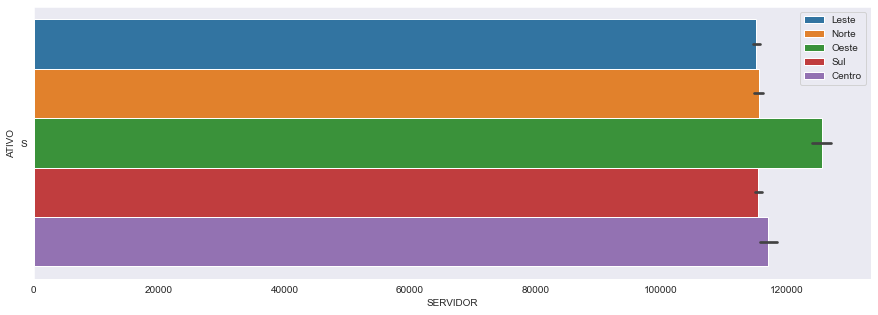

In [95]:
# Plot the values to show what region has more active doctors
plt.figure(figsize=(15,5))
df3 = sns.barplot(x=df_merge['SERVIDOR'], y=df_merge['ATIVO'], hue='REGIAO5', data=df_merge)
plt.legend(loc='upper right')
df3.plot()

[]

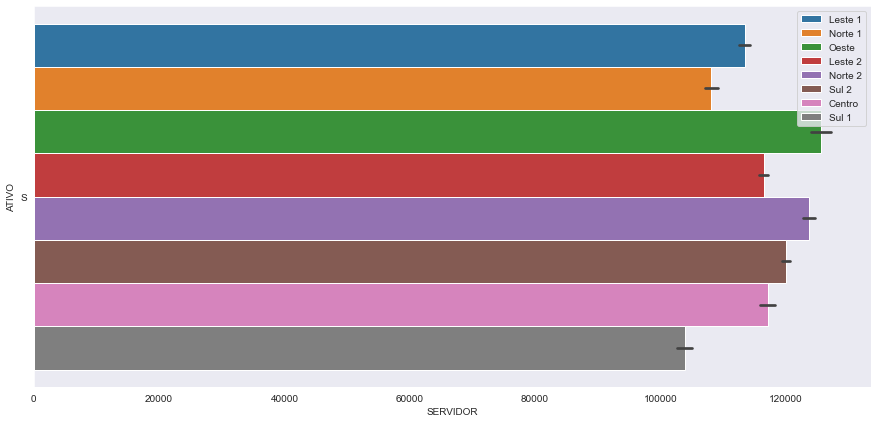

In [96]:
# Plot the values to show what region has more active doctors
plt.figure(figsize=(15,7))
df4 = sns.barplot(x=df_merge['SERVIDOR'], y=df_merge['ATIVO'], hue='REGIAO8', data=df_merge)
plt.legend(loc='upper right')
df4.plot()